# A. Business understanding
**Sentiment Analysis of Youtube Video Trend based on Comments from Viewers for Future Video-making Decision**<br>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;YouTube is the current most popular and active video sharing platform for all groups of users from around the world (Leskin, 2020). Attracting about 44% of all internet users and responsible for 37% of all mobile internet traffic, YouTube is indisputably the one of the most popular website used and visited by all people for purposes such as entertainment, educational, gaming, etc. According to statistics shown by the Omnicore healthcare digital advertising and marketing agency, YouTube is currently home to around 31 million YouTube channels, with more than 1 billion hours of YouTube content being watched every day. Making it the second most visited website and second largest search engine in the world.<br>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the year 2005, YouTube was founded by 3 PayPal employees under the registered domain name “www.youtube.com” (Leskin, 2020). In December 2007, YouTube officially launched the partner program that started the trend or occupation called content creator or YouTuber earning based on ad revenue. In less than a year, certain successful YouTubers have earned a staggering 6 figure income. In April 2010, YouTuber Felix Kjellberg joined YouTube with his channel named PewDiePie which is currently the most subscribed solo creator on YouTube today (Leskin, 2020).<br>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With such impressive numbers and statistics throughout the year since its launching, the YouTube algorithm has evolved throughout the time to attract and maintain its audience (Chi, 2019). In 2005 - 2012, YouTube recommended video based on number of clicks. However, from the year 2012 YouTube has added a new feature on its algorithm which takes into account identifying videos people would like to watch by calculating the view duration of videos (Cooper, 2020). From the year 2016, machine learning has been introduced to develop a better video recommender system.<br><br>

<u>Problem statement</u><br>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Video quality is often determined by the positive comments in the video, as it will lead to a positive video popularity increment and a healthy Youtube channel growth, which improves the YouTuber reputation. If a video receives a majority of positive comments it means that the video is well received by the general user standpoint hence determines the current trend of the Youtube video genre. However, sometimes YouTubers find it to be difficult to know the current video trends, they wish to know which kind of videos to be produced in order to catch the user's attention. 

<u>Objective</u><br>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To determine the comments whether it is a positive or negative remark.
To determine the types of video that the youtuber is supposed to be focusing on.
To make a sentiment analysis algorithm that could be used by all youtubers.

<u>Proposed Solution</u><br>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We will like to collect the YouTuber’s video data to analyze it. From there, we will  predict the current video trend based on the comments and help YouTubers to determine what video genre should be chosen in order to produce videos that attract viewers with positive comment remarks.
The overall idea of using comments to determine the video-making decision has its own perk. So assuming if we only take account of the number of the viewers and invest productions on video categories where the number of viewers are the highest, it doesn’t means that the video is well-received by viewers nor they are happy about the content, (the number of the view counts does not directly means they like the video, because the viewers might just click into the video and watch only for a few seconds before closing the video as the video might be mass shared into media) as they might be potentially has more dislikes and bad review comments about it and the video is simply just reshare again and again. But, if we are able to determine the sentiment of the viewer through the comments we will be able to capture the user's emotions and produce a better video that is positively accepted by the viewers.
Therefore, we propose a sentiment analysis algorithm to solve the problem that is faced by the YouTuber.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Import CSV file downloaded from Kaggle**<br>
Files used:<br>
1. UScomments.csv<br>
2. USvideos.csv<br>

Available at: https://www.kaggle.com/datasnaek/youtube?select=UScomments.csv

In [ ]:
comments = pd.read_csv('/content/drive/Shared drives/Data science/UScomments.csv', error_bad_lines = False)
videos = pd.read_csv('/content/drive/Shared drives/Data science/USvideos.csv', error_bad_lines = False)
comments.set_index("video_id", inplace = True)
videos.set_index("title", inplace = True)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


# B. Data Understanding<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset is to be retrieved from Kaggle and be implemented into our selected model, which comprises columns such as category id, views, video likes, video dislikes, comment total, date, video id, title, channel title, tags, thumbnail, comment text, replies, scores, compound, comp score. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To achieve the objective of the project, only a selected fews of data are being used, which are category id, comment total, date, comment text, compound, comp score.<br><br>



category id: Video genre identified by numeric order.<br>
date: The date of the video uploaded to the channel.<br>
comment text: Comments given by the viewers to the video directly.<br>
compound: Computed by normalizing the scores(negative, neutral, positive)<br>
comp score: A metric that calculates the sum of all the lexicon ratings which has been normalized between -1(extreme negative) and +1(extreme positive)<br>


# C. Data Pre-processing<br>
1. Rename columns title properly and drop unnecessary columns<br>
2. Drop rows with null values<br>
3. To remove duplicate rows and keep the latest(most recent) row of data based on date<br>
4. Combine data in both csv file based on video_id<br>
5. Create dataframe for data only for testing<br>
5. Partition into training and testing dataset based on number of videos, 70% of videos, their comments are used for training, 30% for testing<br>

In [ ]:
# properly rename columns and drop unnecessary columns
comments.rename(columns={'likes':'comment_likes','replies':'comments_replies'},inplace=True)
videos.rename(columns={'likes':'video_likes','dislikes':'video_dislikes'},inplace=True)

# drop rows with null values
comments=comments.dropna(how='any',axis=0)

# remove duplicates
videos.drop_duplicates(subset='video_id',keep='last',inplace=True)

# combine data in both csv file
combineTable=pd.merge(comments,videos,how='outer',on=['video_id'])

# dataframe for testing data
testData=combineTable[['video_id','category_id','comment_text','video_likes']]
testData=testData.dropna(how='any',axis=0)

# partition into testing and training
a=testData['video_id'].unique()
index=0
for x in range(len(testData)):
  index+=1
  if(testData.iloc[x,0]==a[int((len(a)*0.7))] and testData.iloc[x,0]!=a[int((len(a)*0.7)+1)]):
    break
index=1-(index/len(testData))

X = testData
X_train, X_test = model_selection.train_test_split(X, train_size = 1-index, test_size = index)
X_train = np.array(X_train)
X_train = pd.DataFrame(X_train,columns=['video_id','category_id','Comment','video_likes'])
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test,columns=['video_id','category_id','Comment','video_likes'])

In [ ]:
combineTable.describe()

,category_id,views,video_likes,video_dislikes,comment_total,date
count,691473.000000,6.914730e+05,6.914730e+05,691473.000000,691473.000000,691473.000000
mean,20.219941,1.297757e+06,4.494631e+04,2369.918969,5680.505639,16.781224
std,7.359131,2.779811e+06,1.091876e+05,13433.064074,24494.675583,7.706475
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.100000
25%,17.000000,1.816110e+05,4.381000e+03,137.000000,542.000000,11.100000
50%,23.000000,4.661450e+05,1.305000e+04,454.000000,1548.000000,18.100000
75%,25.000000,1.353041e+06,4.112200e+04,1416.000000,4364.000000,22.100000
max,43.000000,4.150067e+07,2.010366e+06,318404.000000,736179.000000,30.090000


# D. Modelling<br>
***We are using:***<br> 
**Text Sentiment Analysis using VADER (Valence Aware Dictionary and Sentiment Reasoner)**<br>
VADER analysis is a lexicon and rule-based sentinent analysis tool, it is done by counting number of positive and negative words in a sentence to analyze and determine the overall compound score of the sentence<br>
**Reason for choosing VADER:**<br>
VADER analysis is specifically used in the context of sentiments/emotions expression and also widely used in analyzing movie/product review, social media texts etc. Besides that, VADER also take into accounts of emojis, acronyms (LOL, ASAP, etc), and emoticons such as :( and :-D This is particularly useful as the current generations frequently used all these informal way to expressed their emotions. Hence, based on the capabilities mention above, VADER is excellent in analyzing social media sentiment and thus we will use it to analyze on YouTube comments.

In [ ]:
sid = SentimentIntensityAnalyzer()

scores_train = X_train.Comment.apply(lambda x: sid.polarity_scores(x))
compound_train  = scores_train.apply(lambda score_dict: score_dict['compound'])
y_train = compound_train.apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <=-0.05 else 'neu'))
y_train = pd.Series(y_train)

train = {'Comment': X_train.Comment, 'Category ID': X_train.category_id}
train_data = pd.DataFrame(train)

train_data['neg'] = [sid.polarity_scores(x)['neg'] for x in train['Comment']]
train_data['neu'] = [sid.polarity_scores(x)['neu'] for x in train['Comment']]
train_data['pos'] = [sid.polarity_scores(x)['pos'] for x in train['Comment']]
train_data['Compound'] = compound_train
train_data['Compound Score'] = y_train

train_data

,Comment,Category ID,neg,neu,pos,Compound,Compound Score
0,Якi прыгожы сюжэт! \n\nЭмацыянальная музыка на...,22,0.000,1.000,0.000,0.0000,neu
1,I love crowder! But I don't like this song. To...,10,0.135,0.577,0.288,0.5239,pos
2,Awwww \n*Congratulations!*\nSuch a lovely fami...,22,0.000,0.652,0.348,0.8962,pos
3,"I don't suffer from depression, but I know a l...",22,0.106,0.670,0.224,0.8380,pos
4,THIS IS PRACTICALLY LANA DEL REY IN MOVIE FORM!,1,0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...,...
484748,"Money talks, pedophiles walk. That's the way i...",25,0.000,1.000,0.000,0.0000,neu
484749,Wait she has a YouTube 😩,1,0.000,1.000,0.000,0.0000,neu
484750,Pretty awesome catch. \n\nI know everyone’s jo...,22,0.177,0.596,0.227,-0.1655,neg
484751,Who else were trying to get the correct answer...,22,0.000,1.000,0.000,0.0000,neu


In [ ]:
scores_test = X_test.Comment.apply(lambda x: sid.polarity_scores(x))
compound_test  = scores_test.apply(lambda score_dict: score_dict['compound'])
y_test = compound_test.apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <=-0.05 else 'neu'))
y_test = pd.Series(y_test)

test = {'Comment': X_test.Comment, 'Category ID': X_test.category_id} 
test_data = pd.DataFrame(test)

test_data['neg'] = [sid.polarity_scores(x)['neg'] for x in test['Comment']]
test_data['neu'] = [sid.polarity_scores(x)['neu'] for x in test['Comment']]
test_data['pos'] = [sid.polarity_scores(x)['pos'] for x in test['Comment']]
test_data['Compound'] = compound_test
test_data['Compound Score'] = y_test

test_data

,Comment,Category ID,neg,neu,pos,Compound,Compound Score
0,💓💓💓💓💓💓💓💓💓,10,0.000,1.000,0.000,0.0000,neu
1,When you realised the first guy in the video i...,25,0.000,1.000,0.000,0.0000,neu
2,Are we sure this isn't a comedy skit??,22,0.216,0.512,0.272,0.1406,pos
3,lol!!! i love how he shouts out Whaaat?!!! and...,23,0.000,0.373,0.627,0.9147,pos
4,Fucking this isnt buzzfeed unsolved. More like...,17,0.267,0.524,0.209,-0.1952,neg
...,...,...,...,...,...,...,...
206617,R\nO\nB\nI\nN\nRead more\nW\nI\nL\nL\nI\nA\nM\...,22,0.000,0.345,0.655,0.5859,pos
206618,Is Wild corn lilly also called western false ...,27,0.000,1.000,0.000,0.0000,neu
206619,Another reality show make Black women look bad,24,0.333,0.667,0.000,-0.5423,neg
206620,😍😍😍😍😍😍😍😍😜😜😜😜😜💏👍👍👍👌☝👅💋💞💝💣💣💣💣💣💣💥💥💥💥💥,10,0.000,1.000,0.000,0.0000,neu


**Feature Extraction (Vectorization)**<br>

In order to get a more accurate results from predictive modelling, the comments must be parsed to remove some unnecessary words. This process is known as tokenization. The words then obtained from tokenization are to be encoded as integers, or floating point values as inputs for the machine learning algorithms. This process of encoding is known as feature extraction (vectorization).<br>

CountVectorizer in Scikit-learn is utilized to convert the words from texts/documents to a vector of token counts. It also allows the text data to be pre-processed before generating the vector representation.

In [ ]:
vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train.Comment)

**Balancing Data**<br>

In order to come to a decision on whether the data need to be balanced, each category (positive, negative, neutral) of the data is counted. The highest count is then used in order to estimate the prediction accuracy.

In [ ]:
counts = y_train.value_counts()
print(counts)
print("\nPredicting only pos = {:.2f}% accuracy".format(counts['pos'] / sum(counts) * 100))

pos    218142
neu    168810
neg     97801
Name: Comment, dtype: int64

Predicting only pos = 45.00% accuracy


After obtaining the data count for each category, it can be seen that the data are clearly imbalanced as there are more positive data compared to negative ones. The data is balanced using a form of oversampling called SMOTE. SMOTE looks at the minor class and creates new, synthetic training examples.

Take note that we only oversample the train data as that is the data we are going to use in order to train our model.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[('neg', 218142), ('neu', 218142), ('pos', 218142)]


**Naive Bayes**<br>

The Naive Bayes classifier is a simple classifier that classifies based on probabilities of events. It is mostly used for text classification. Despite being quite simple, it performs very well on text classifications.

In [ ]:
nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.671767319758078

After the data has been succesfully fit into Naive Bayes, we can see the fit score. The next step is to vectorize the X_test comment dataset and apply it in the Naive Bayes algorithm. As we are avoiding any data leakage, we are only transforming the X_test comment dataset, not refitting it. On top of that, we will not be oversampling the data either.

In [ ]:
X_test_vect = vect.transform(X_test.Comment)

y_pred = nb.predict(X_test_vect)

y_pred

array(['neu', 'pos', 'neu', ..., 'neg', 'neg', 'pos'], dtype='<U3')

y_pred now consists of predictions for every row of the X_test comment dataset. The prediction results can be passed into an sklearn metric with the true labels to generate a confusion matrix and classification report (accuracy, precison, recall, F1-score).


# E. Evaluation
Confusion matrix is applied to test between y_predict obtained from Multinomial Naive Bayes classifications, and y_test obtained from VADER model.

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

**To display results of confusion matrix with heatmap graph**

              precision    recall  f1-score   support

         neg       0.45      0.71      0.55     41780
         neu       0.74      0.59      0.66     71888
         pos       0.85      0.77      0.81     92954

    accuracy                           0.70    206622
   macro avg       0.68      0.69      0.67    206622
weighted avg       0.73      0.70      0.71    206622



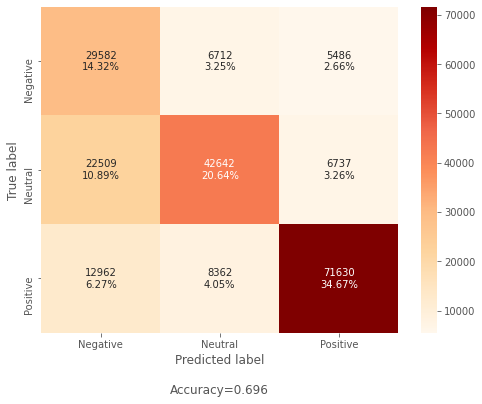

In [ ]:
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative', 'Neutral', 'Positive']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, figsize=(8,6), cmap='OrRd')

After the model has been trained and tested, the next step is to deploy the model to be used by giving the model comments as input.

In [ ]:
def predict_sentiment(a, train=train, model=nb):
  vect_text = vect.transform([a])
  pred = model.predict(vect_text)

  if(pred[0]=='neg'):
    sentiment = 'Negative'
  elif(pred[0]=='neu'):
    sentiment = 'Neutral'
  elif(pred[0]=='pos'):
    sentiment = 'Positive'

  return sentiment

Type your own example and use the trained Naives Bayes model to predict your text sentiment.

In [ ]:
text = 'I am happy'
predict_sentiment(text)

'Positive'

# F. Deployment<br>
We will be using shadow deployment which is a type of kubernetes deployment that deploys through using containers. Both old and new algorithms will be deployed alongside each other. Users will still be using the old algorithm to get to know the newest trend but any input that from the user will be retrieved and inserted into the new algorithm too to test the new algorithm. By doing so, there will be no impact to the users since they will still be using the old algorithm only. When the newer algorithm shows results that it meets the performance requirement needed and still maintains its stability, it will roll out the new algorithm.


# G. Visualization with graphs

Hardcode youtube category ID to it's corresponding category in words as the dataset didn't provide the categories in words.

In [ ]:
# hardcoded youtube category by refering internet as all categories given by dataset are in number
youTubeCategory=[[1,'Film & animation'],[22,'People & Blogs'],[17,'Sports'],
                 [24,'Entertainment'],[28,'Science & Technology'],[27,'Education'],
                 [25,'News & Politics'],[26,'Howto & Style'],[20,'Gaming'],
                 [10,'Music'],[23,'Comedy'],[2,'Autos & Vehicles'],[15,'Pets & Animals'],
                 [19,'Travel & Events'],[29,'Nonprofits & Activism'],[43,'Shows']]

**Plot horizontal bar graphs of youtube categories with average positive score, neutral and negative score from VADER analysis**

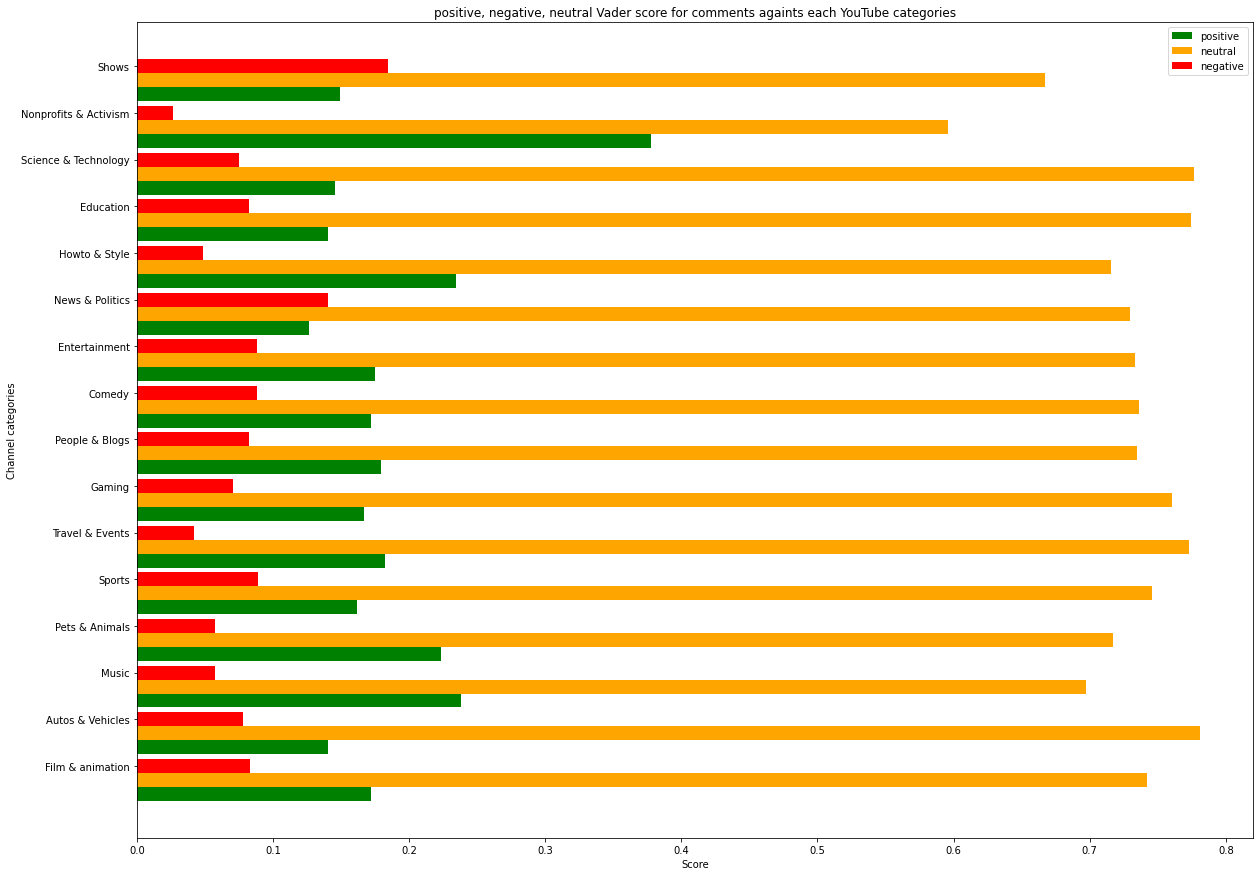

In [ ]:
hb = test_data
hbneg = test_data.groupby('Category ID')['neg'].mean().reset_index()
hbpos = test_data.groupby('Category ID')['pos'].mean().reset_index()
hbneu = test_data.groupby('Category ID')['neu'].mean().reset_index()
hb = pd.merge(hbneg,hbpos,how='outer',on=['Category ID'])
hb = pd.merge(hb,hbneu,how='outer',on=['Category ID'])

# convert numeric category id to its corresponds words
for x in range(len(hb)):
  for y in range(len(hb)):
    if(hb.iloc[x,0]==youTubeCategory[y][0]):
      hb.iloc[x,0]=youTubeCategory[y][1]

# hb.plot.barh(width=0.85)
ind=np.arange(len(hb))
width=0.3
fig,ax=plt.subplots(figsize=(20,15))
ax.set_xlabel('Score')
ax.set_ylabel('Channel categories')
ax.barh(ind,hb['pos'],width,label='positive',color='green')
ax.barh(ind+width,hb['neu'],width,label='neutral',color='orange')
ax.barh(ind+width+width,hb['neg'],width,label='negative',color='red')
ax.set(yticks=ind+width+width,yticklabels=hb['Category ID'])
ax.set_title('positive, negative, neutral Vader score for comments againts each YouTube categories')
ax.legend()

<BarContainer object of 16 artists>

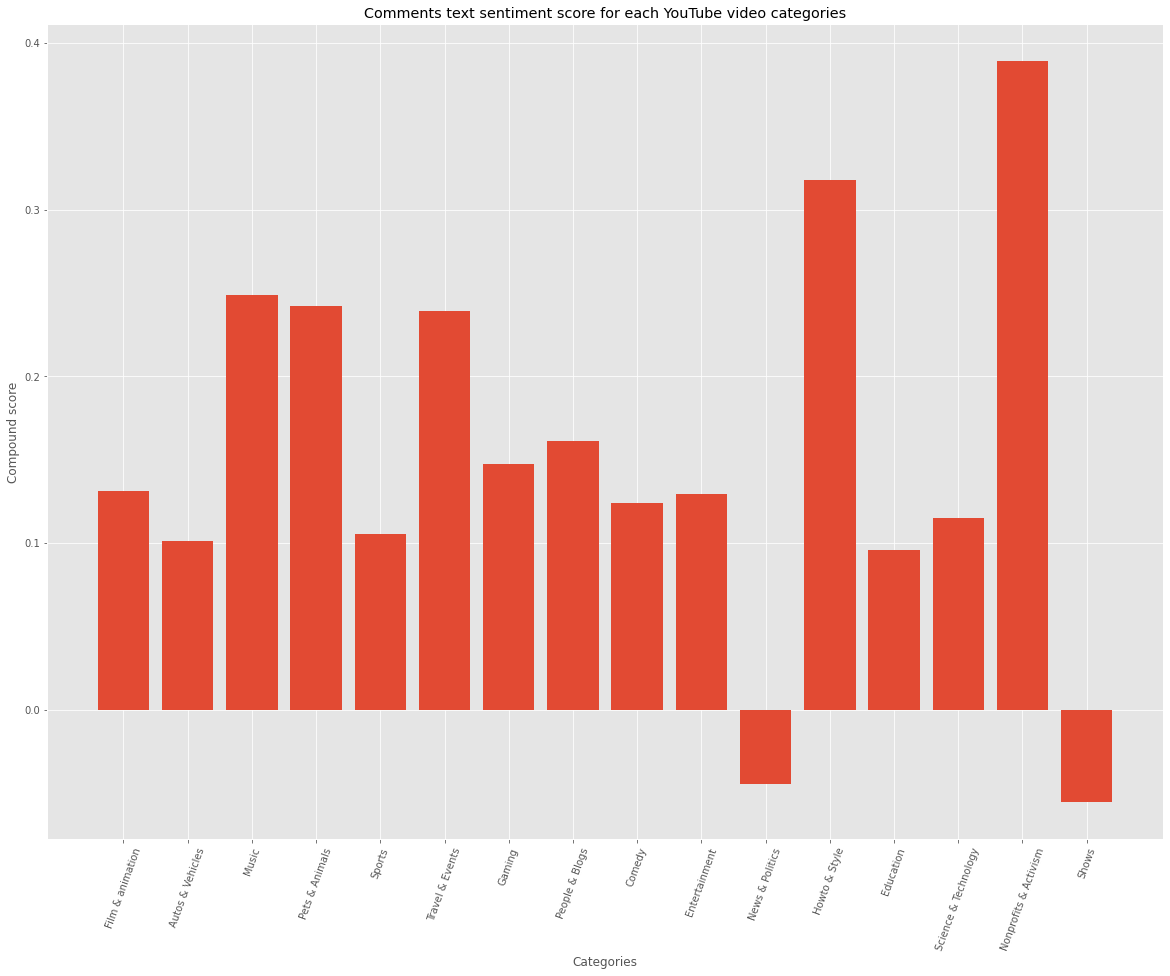

In [ ]:
import matplotlib
plt.rcParams['figure.figsize']=(20,15)
plt.xticks(rotation=70)
plt.style.use('ggplot')
plt.xlabel('Categories')
plt.ylabel('Compound score')
plt.title('Comments text sentiment score for each YouTube video categories')
plt.bar(t['Category ID'],t['Compound'])

# H. Conclusion
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We test on VADER model to analyze YouTube video comments on training and testing data. Next, we use Multinomial Naive Bayes as text classifiers to get y_predict as the dataset did not provide an actual y_predict. FFor the next step, we use SMOTE, an oversampling method to balance our data in positive, negative, and neutral categories for y_test data. Lastly, confusion matrix is used to visualize the comparisons between VADER analysis score and multinomial naive bayes score using y_test and y_predict.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the output, we can clearly see that comments from "Nonprofits & Activism" categories is most positively given. This means that people watching videos of "Nonprofits & Activism" categories give out more positive comments as compared to other video categories. Moving on, "Howto & Style" category video comes second with most positive comments. In contrast, "Shows" and "News & Politics" receive the most negative comments which indicates how users might not like to watch videos of those categories. Hence, we could conclude that YouTubers should create more content of "Nonprofits & Activism" category as viewers tend to give more positive comments on that type of video implying they prefer that type of content.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One advantage of our VADER model is that it is suitable for social media mining as its nature is to analyze polarity of lexicons (words). This means that VADER is quite sensitive to the strength of emotion of each word. Semantically, it determines how positive or negative each word is in a sentence. Therefore, in social media comments where words are used to express emotions of people, VADER model is extremely appropriate for testing the comments.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Another advantage of our analysis is that we are using comments of a video to analyze viewers' preferences on choosing content. Comments of videos are often neglected by YouTube when they are analyzing trending videos categories based on their algorithm. YouTube focusses too much on other aspect such as viewers browsing behaviours, most watched vidoes, number of subscribers, etc. However, comments of videos is also quite an important factor as it directly tells how viewers feel about a video and whether they are receiving it positively. <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One disadvantage of using the VADER model is that it tends to overlook contextual meaning of a sentence. As VADER only calculates the score of each word, the context of the whole sentence which potentially brings other meaning could be neglected. For example, someone posting the comment “You are fat” could actually mean the opposite as he/she is just trying to be sarcastic. Therefore, in certain cases VADER model actually interpret the emotion of the comments wrongly in the opposite manner.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Another disadvantage of the VADER model is that it is built over English language. Hence, comments which are not in English such as Mandarin, Russian, Spanish, etc could not be analyzed using VADER analysis. This implies that we could lose substantial amount of data as all the non-English comments to be tested with the VADER model should be eliminated. Hence, in our case this could reduce the accuracy of a category if the comments for the particular category is mostly non-English.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Another disadvantage of our project is that we overlook other causes that might affect the decision of which content is more trending currently. For example, number of views and likes/dislikes could also implies that viewers prefer/do not prefer that kind of content. By analyzing the positivity/negativity score on each comment for video is insufficient to be 100% sure that the type of content is trending even though comments is also essentially important.<br><br>


# I. References
Leskin, P., 2020. Youtube Is 15 Years Old. Here's A Timeline Of How Youtube Was Founded, Its Rise To Video Behemoth, And Its Biggest Controversies Along Way. [online] Business Insider.<br> Available at: <https://www.businessinsider.com/history-of-youtube-in-photos-2015-10><br> [Accessed 2 September 2020].<br><br>

Omnicoreagency.com. 2020. • Youtube By The Numbers (2020): Stats, Demographics & Fun Facts. [online] Available at: <https://www.omnicoreagency.com/youtube-statistics/> [Accessed 2 September 2020].<br><br>

Chi, C., 2019. Youtube Algorithm: The Constantly Updated Guide To Youtube's Updates & Changes. [online] Blog.hubspot.com. <br>Available at: <https://blog.hubspot.com/marketing/youtube-algorithm><br> [Accessed 2 September 2020].<br><br>

Cooper, P., 2020. How Does The Youtube Algorithm Work? A Guide To Getting More Views. [online] Social Media Marketing & Management Dashboard.<br> Available at: <https://blog.hootsuite.com/how-the-youtube-algorithm-works/><br> [Accessed 2 September 2020].

# J. Appendix
Datasets available at: https://www.kaggle.com/datasnaek/youtube?select=UScomments.csv<br>
